In [1]:
%matplotlib inline

/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:280: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  import matplotlib


In [2]:
import pandas as pd
import seaborn as sns
import pylab as py
import arviz as ar

from pm_model import RandomModel
from pm_model import GLMBernoulli, GLMBernoulli2E
from pm_model import TargetWeightedBeta, TargetWeightedDirichlet
from profiles import ProfileCollection, Judgement
import utils

from followthemoney.types import registry

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/profiles.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
profiles = ProfileCollection.load_dir('../../../data/profiles/')

In [4]:
#datafile = "profiles_processed_propcompare.pkl"
datafile = "profiles_processed_groupscompare.pkl"
datafile_path = '../../../data/' + datafile
try:
    raise FileNotFoundError
    df = pd.read_pickle(datafile_path)
except FileNotFoundError:
    df = utils.profiles_to_pairs_pandas(profiles, judgements={Judgement.POSITIVE, Judgement.NEGATIVE})
    df.to_pickle(datafile_path)
    
targets = utils.TARGETS
df[targets].info()

  0%|          | 0/4580 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31776 entries, 0 to 31775
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        31387 non-null  float64
 1   country     19852 non-null  float64
 2   date        4480 non-null   float64
 3   identifier  2913 non-null   float64
 4   address     5300 non-null   float64
 5   phone       208 non-null    float64
 6   email       561 non-null    float64
 7   iban        14 non-null     float64
 8   url         228 non-null    float64
dtypes: float64(9)
memory usage: 2.4 MB


<AxesSubplot:xlabel='weight', ylabel='Count'>

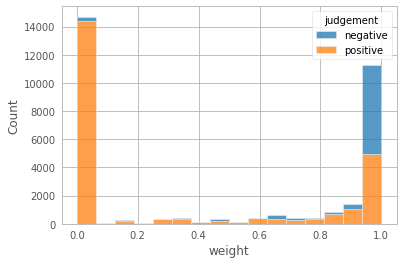

In [5]:
sns.histplot(df, x='weight', hue='judgement', multiple='stack')

<AxesSubplot:xlabel='judgement', ylabel='Count'>

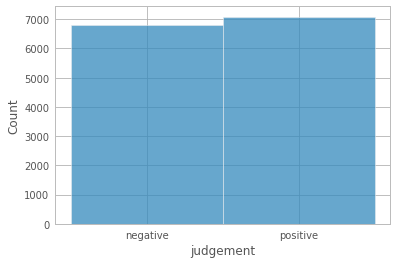

In [6]:
sns.histplot(df.query('weight > 0.75'), x='judgement')

In [7]:
d = df.query('weight > 0.75').sample(frac=0.75)

targets_2e = (
     ('pct_full','pct_full'),
     ('name','pct_full'),
     ('name','name'),
     ('pct_full','pct_partial'),
     ('pct_partial','pct_partial'),
     ('name','identifier'),
     ('country','pct_full'),
     ('identifier','identifier'),
     ('identifier','pct_partial'),
     ('name','date'),
     ('date','date'),
     ('address','address')
)

models = {
    "random": RandomModel(d),
    "glm_bernoulli": GLMBernoulli(d),
    "glm_bernoulli_ftm": GLMBernoulli(d,
                                      targets=['ftm_score']),
    "glm_bernoulli_pct": GLMBernoulli(d,
                                      targets=targets + ['pct_full', 'pct_partial']),
    "glm_bernoulli2e_pct": GLMBernoulli2E(d,
                                          targets=targets + ['pct_full', 'pct_partial'],
                                          targets_2e=targets_2e),
    #"target_w_beta": TargetWeightedBeta(d),
    #"target_w_dirichlet": TargetWeightedDirichlet(d),
}

In [8]:
for name, model in models.items():
    print("Sampling model:", model)
    model.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sampling model: <pm_model.RandomModel object at 0x7feadc1a8040>
Sampling model: <pm_model.GLMBernoulli object at 0x7feadc1bf340>


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, coef]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 301 seconds.
The acceptance probability does not match the target. It is 0.8814992524413349, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sampling model: <pm_model.GLMBernoulli object at 0x7feacdf7c040>


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, coef]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 50 seconds.
The acceptance probability does not match the target. It is 0.8905879456436382, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sampling model: <pm_model.GLMBernoulli object at 0x7feac7c6a070>


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, coef]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 326 seconds.
The acceptance probability does not match the target. It is 0.8855930683774684, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sampling model: <pm_model.GLMBernoulli2E object at 0x7feac56a1b50>


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, coef_2e, coef]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 2096 seconds.
The acceptance probability does not match the target. It is 0.8805615172975433, but should be close to 0.8. Try to increase the number of tuning steps.


<Figure size 432x288 with 0 Axes>

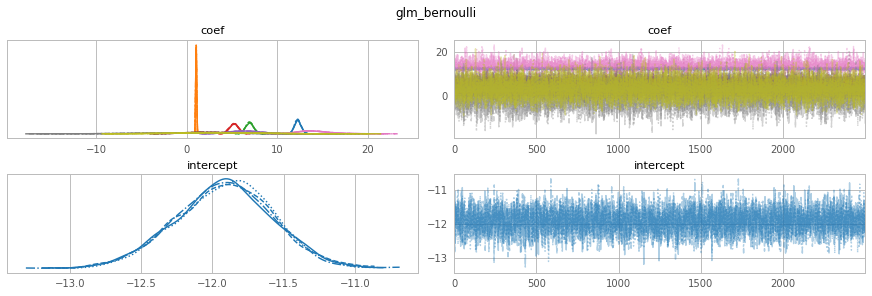

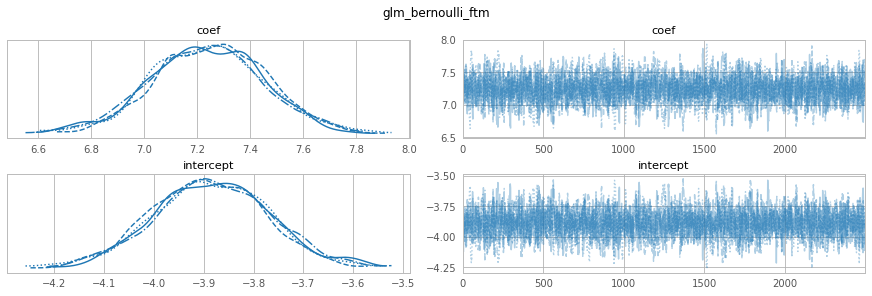

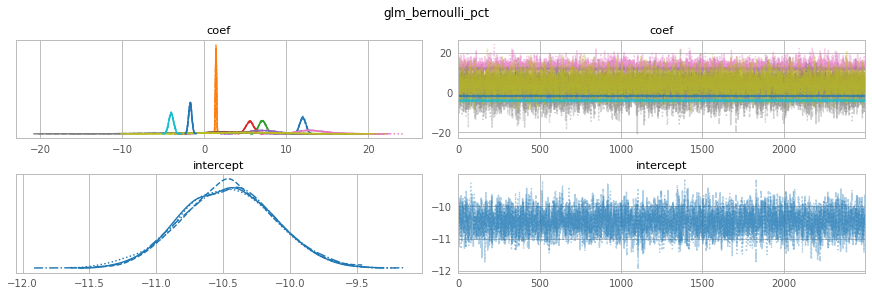

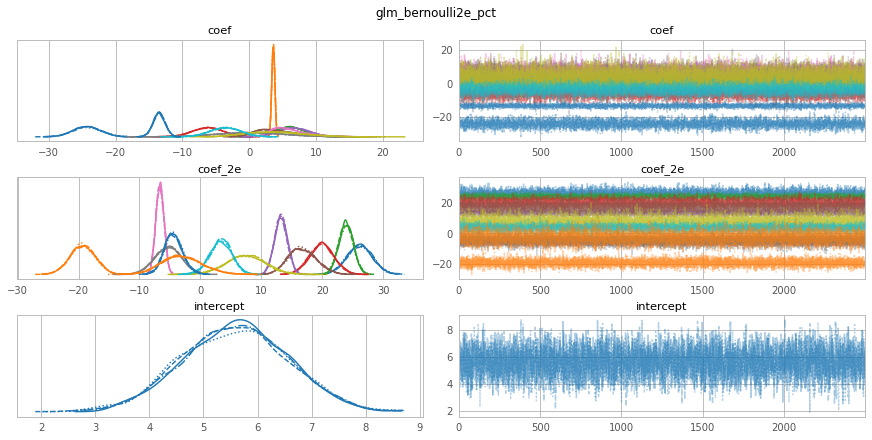

In [9]:
for name, model in models.items():
    model.traceplot()
    py.suptitle(name)

/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/pm_model.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["estimate"] = self.evaluate(data, mle=True)
/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/pm_model.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["estimate"] = self.evaluate(data, mle=True)
/home/micha/work/occrp/followthemoney-predict/experiments/xref-e

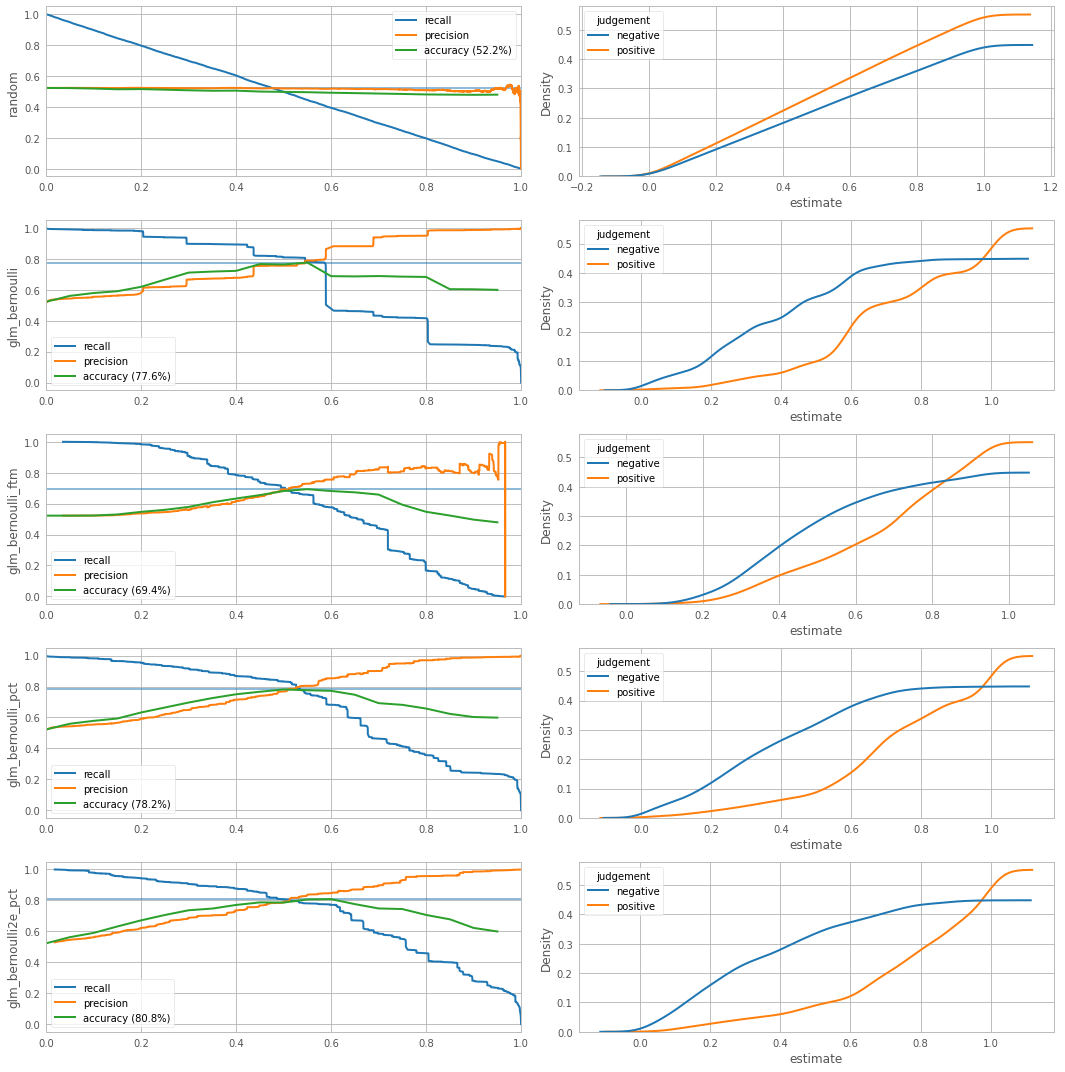

In [10]:
fig, axs = py.subplots(nrows=len(models), ncols=2, figsize = (15, 3 * len(models)))
for ax, (name, model) in zip(axs, models.items()):
    model.precision_recall_accuracy_curve(df, ax=ax[0])
    model.estimate_distribution(df.query('weight > 0.1'), ax=ax[1])
    ax[0].set_ylabel(name)
py.tight_layout()

In [38]:
model = models['glm_bernoulli2e_pct']

In [40]:
int_mean = model._trace.get_values('intercept').mean(axis=0)
int_std = model._trace.get_values('intercept').std(axis=0)
print(int_mean, int_std)

5.589433682891846 0.9811015783158169


In [37]:
coef_2e_mean = model._trace.get_values('coef_2e').mean(axis=0)
coef_2e_std = model._trace.get_values('coef_2e').std(axis=0)
coef_2e = dict(zip(model.targets_2e, zip(coef_2e_mean, coef_2e_std)))
coef_2e

{('pct_full', 'pct_full'): (26.151906215031815, 2.0970652780889507),
 ('name', 'pct_full'): (-19.35174188357724, 2.071492861178213),
 ('name', 'name'): (23.89925600719811, 1.1915447762503575),
 ('pct_full', 'pct_partial'): (19.894087567105647, 2.000018910030359),
 ('pct_partial', 'pct_partial'): (13.219010869718824, 1.0532469118203778),
 ('name', 'identifier'): (16.758667921303825, 2.2841404137459125),
 ('country', 'pct_full'): (-6.64650309651755, 0.6714509176272625),
 ('identifier', 'identifier'): (-5.304117908770325, 2.199968612741954),
 ('identifier', 'pct_partial'): (7.41438568126942, 3.1938942218171182),
 ('name', 'date'): (3.3523490498182946, 1.7970524240784431),
 ('date', 'date'): (-4.426185415082174, 1.510437486231509),
 ('address', 'address'): (-3.0376680720688194, 3.326693554975815)}

In [35]:
coef_mean = model._trace.get_values('coef').mean(axis=0)
coef_std = model._trace.get_values('coef').std(axis=0)
dict(zip(zip(model.targets), zip(coef_mean, coef_std)))

{('name',): (-24.268534066205447, 2.0497389854930987),
 ('country',): (3.5938224600516566, 0.22505922237414097),
 ('date',): (5.974701138854431, 2.108424605543768),
 ('identifier',): (-6.27038029338114, 2.249221054664241),
 ('address',): (6.65275198732298, 2.385777543490086),
 ('phone',): (4.1438833545393905, 3.085653763279177),
 ('email',): (6.009222508685724, 2.6311187342638194),
 ('iban',): (0.020676549438534555, 5.028062505445661),
 ('url',): (3.835980249364194, 4.100630780462701),
 ('pct_full',): (-3.566923731897434, 2.2522024162005767),
 ('pct_partial',): (-13.507017173458095, 0.8759702406903143)}

               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
coef[0]     -24.269  2.050 -27.913  -20.271      0.029    0.021    4943.0   
coef[1]       3.594  0.225   3.164    4.004      0.003    0.002    7335.0   
coef[2]       5.975  2.109   1.848    9.819      0.025    0.017    7353.0   
coef[3]      -6.270  2.249 -10.517   -2.079      0.028    0.020    6615.0   
coef[4]       6.653  2.386   2.017   11.054      0.027    0.019    8049.0   
coef[5]       4.144  3.086  -0.886   10.182      0.030    0.028   13514.0   
coef[6]       6.009  2.631   1.733   10.798      0.031    0.026   10554.0   
coef[7]       0.021  5.028  -9.409    9.394      0.040    0.060   16149.0   
coef[8]       3.836  4.101  -3.643   11.359      0.034    0.036   15481.0   
coef[9]      -3.567  2.252  -7.764    0.665      0.030    0.021    5747.0   
coef[10]    -13.507  0.876 -15.158  -11.856      0.011    0.008    6116.0   
coef_2e[0]   26.152  2.097  22.179   30.041      0.025    0.017    7240.0   

array([[<AxesSubplot:title={'center':'coef'}>,
        <AxesSubplot:title={'center':'coef'}>],
       [<AxesSubplot:title={'center':'coef_2e'}>,
        <AxesSubplot:title={'center':'coef_2e'}>],
       [<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>]], dtype=object)

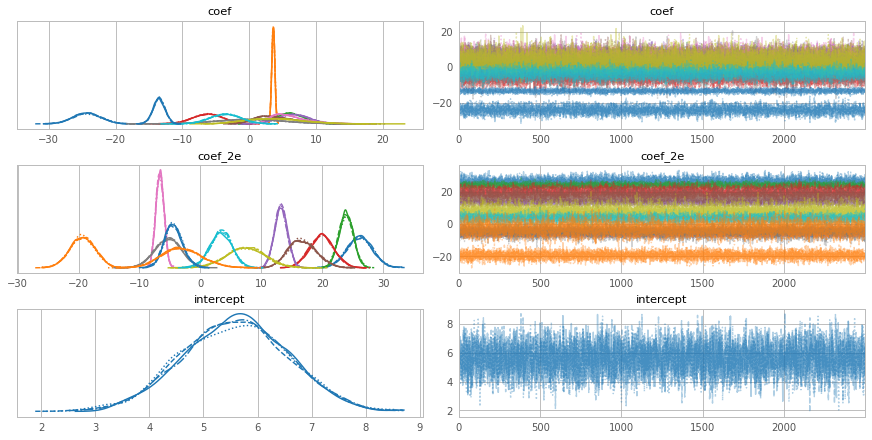

In [13]:
model.summarize()

In [14]:
df['estimate'] = model.evaluate(df)
df['tmp'] = abs(df.estimate - df.y)

<AxesSubplot:>

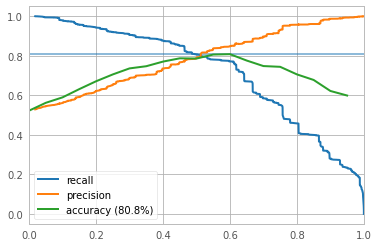

In [15]:
model.precision_recall_accuracy_curve(df)

<AxesSubplot:xlabel='estimate', ylabel='Count'>

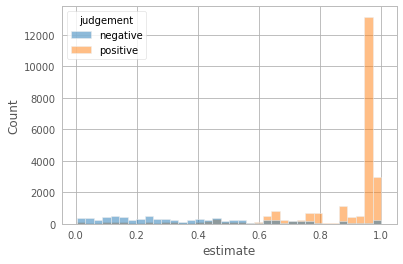

In [16]:
sns.histplot(df, x='estimate', hue='judgement')

In [17]:
inspect = df.sort_values('tmp', ascending=False).query('has_identifier == True')
inspect[model.targets + ['entity', 'judgement', 'estimate', 'tmp', 'weight']].head()

,name,country,date,identifier,address,phone,email,iban,url,pct_full,pct_partial,entity,judgement,estimate,tmp,weight
15192,0.859821,1.0,1.0,0.35,0.0,NaN,NaN,NaN,NaN,0.555556,0.0,NaN,negative,0.996886,0.996886,0.765762
14283,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.222222,0.0,0.0,positive,0.004126,0.995874,0.000000
14284,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.222222,0.0,0.0,positive,0.004126,0.995874,0.000000
14287,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.222222,0.0,0.0,positive,0.004126,0.995874,0.000000
14285,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.222222,0.0,0.0,positive,0.004126,0.995874,0.000000


In [18]:
inspect[['right_id', 'left_id']].head().values

array([['03302e53da61eeaffe51648df713c5cbbdbf2e35.c3023bde63893ae1d289f2795c1740c17bd7487c',
        'ebe6d8310a1572eb15d894b72ca77a069c66048d.4c507fad700f4bfed2c62986a0789c6e288faf06'],
       ['spin-canonicalname-median-acc-3558675828310521384.b98a29e528a56a8df762e1c229981d4822878c4b',
        'spin-canonicalname-median-acc-5097128243462161534.048db729337b0284260d026103ff0fbb890992f3'],
       ['spin-canonicalname-median-acc-2864206889400017778.1061686ed1df179eff2bd76e348823a7787b172f',
        'spin-canonicalname-median-acc-5097128243462161534.048db729337b0284260d026103ff0fbb890992f3'],
       ['spin-canonicalname-median-acc-5097128243462161534.4ee28d027cd4f66b0f0578ffdb3cfcf1847e1647',
        'spin-canonicalname-median-acc-2864206889400017778.30d2b8d91fc1dc592b962579f3f5e3a8eb3c9ee8'],
       ['spin-canonicalname-median-acc-7624656354414760820.33d5feef224bae8b68dd7c15048c6fe32f63e9b5',
        'spin-canonicalname-median-acc-5097128243462161534.048db729337b0284260d026103ff0fbb89099

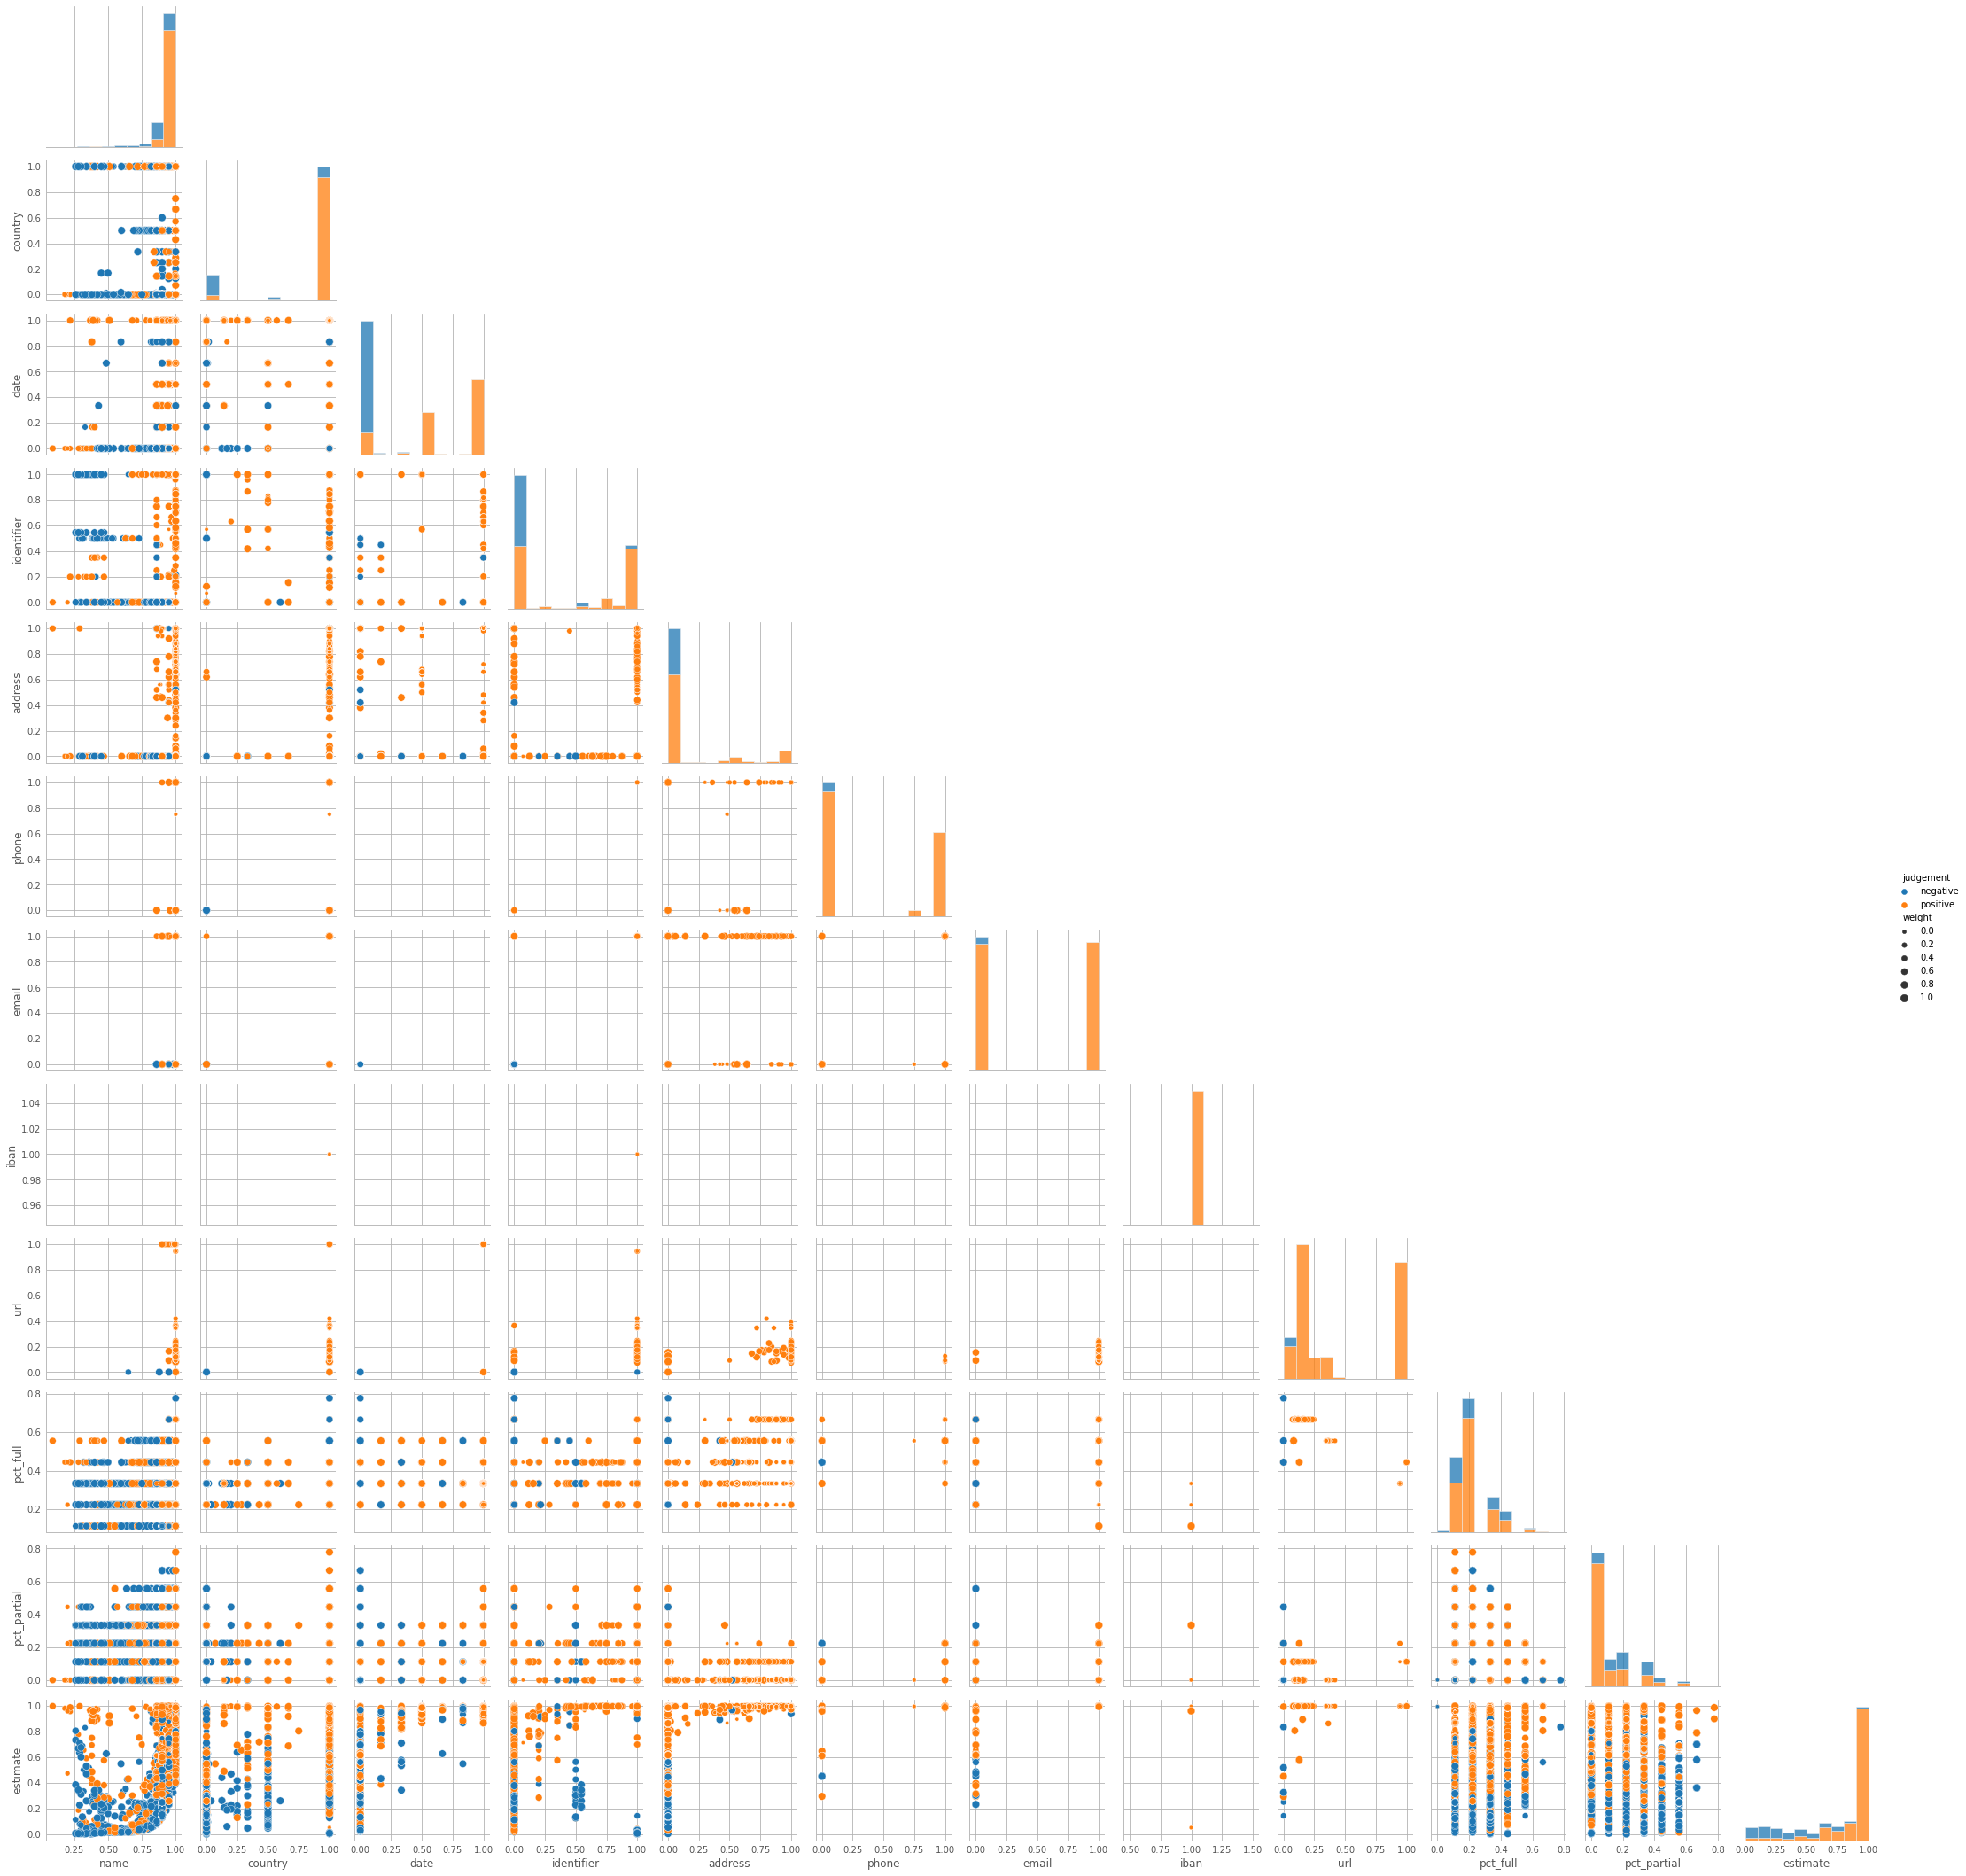

In [19]:
g = sns.PairGrid(df, hue='judgement', vars=model.targets + ['estimate'],
                 diag_sharey=False, corner=True, dropna=True)
g.map_diag(sns.histplot, multiple="stack", bins=10)
g.map_lower(sns.scatterplot, size=df['weight'])
g.add_legend(title="", adjust_subtitles=True)

In [20]:
result = model.evaluate(df, mle=False)
df['estimate_std'] = result.std(axis=-1)
df['estimate_mean'] = result.mean(axis=-1)
del result

<AxesSubplot:xlabel='estimate_std', ylabel='Count'>

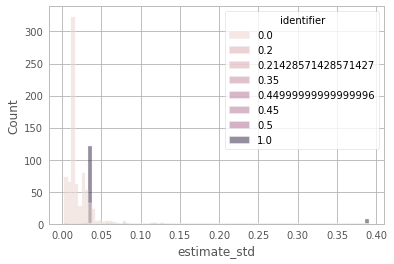

In [23]:
d = df.query('tmp > 0.5').sort_values(['estimate_std'], ascending=False)

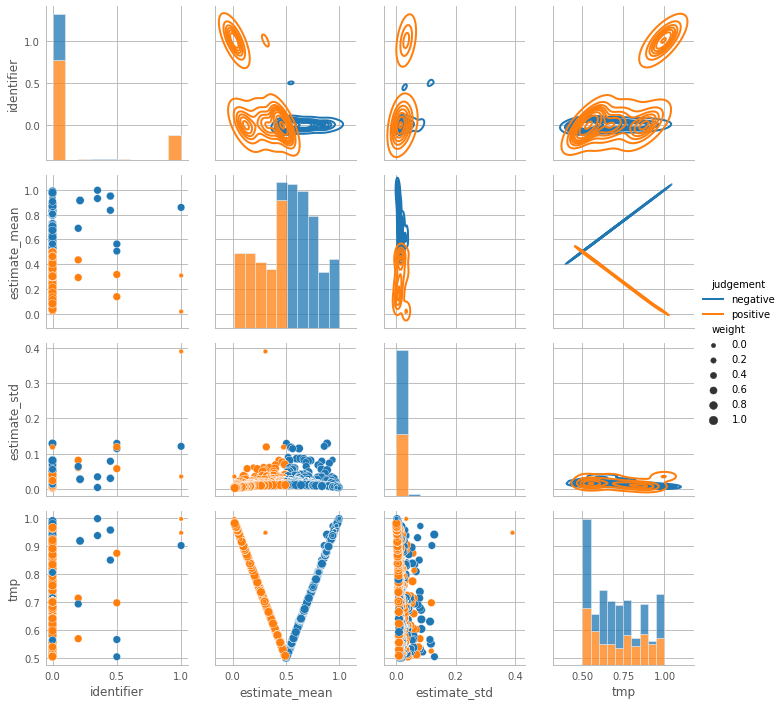

In [30]:
g = sns.PairGrid(d, hue='judgement', vars=['identifier', 'estimate_mean', 'estimate_std', 'tmp'],
                 diag_sharey=False, corner=False, dropna=True)
g.map_diag(sns.histplot, multiple="stack", bins=10)
g.map_lower(sns.scatterplot, size=d['weight'])
g.map_upper(sns.kdeplot)
g.add_legend(title="", adjust_subtitles=True)

In [47]:
from followthemoney import compare2
from followthemoney import model as ftm_model
ENTITY = {
    "id": "test",
    "schema": "Person",
    "properties": {
        "name": ["Ralph Tester"],
        "birthDate": ["1972-05-01"],
        "idNumber": ["9177171", "8e839023"],
        "topics": ["role.spy"],
    },
}

In [55]:
scores = compare2.compare_scores(ftm_model, ENTITY, ENTITY)
d = pd.DataFrame.from_records([scores])
d['pct_full'] = sum(s is not None for s in scores.values()) / len(utils.TARGETS)
d['pct_partial'] = sum(s is None for s in scores.values()) / len(utils.TARGETS)

for f in model.targets:
    if f not in d.columns:
        d[f] = 0
model.evaluate(d, mle=False).mean()

0.9990348779334907

In [75]:
import numpy as np
tmp = np.core.records.fromarrays(
    [
        *model._trace.get_values("coef").T,
        *model._trace.get_values("coef_2e").T,
        model._trace.get_values("intercept").T
    ],
    names=tuple(model.targets) + tuple(map("::".join, model.targets_2e)) + ('',)
)

In [85]:
dict(zip(    
    tuple(model.targets) + tuple(map("::".join, model.targets_2e)) + ('',),
    [
        *model._trace.get_values("coef").T,
        *model._trace.get_values("coef_2e").T,
        model._trace.get_values("intercept").T
    ]
))

{'name': array([-26.54640396, -24.77282174, -25.49375148, ..., -25.70210999,
        -23.49913537, -24.83331973]),
 'country': array([3.79829364, 3.27239783, 4.156992  , ..., 3.57349496, 3.4215462 ,
        3.5617955 ]),
 'date': array([5.96744595, 6.56129791, 8.30155727, ..., 3.69493127, 6.07124727,
        6.33387132]),
 'identifier': array([ -2.19525369,  -8.93608753,  -7.10314568, ...,  -3.98462052,
         -2.35191285, -10.0900496 ]),
 'address': array([14.93260471,  6.21379392,  7.87621303, ...,  4.27290733,
         4.07660068,  9.41989045]),
 'phone': array([10.71567278,  2.04517453,  5.356438  , ...,  0.47944649,
         5.53108528,  2.47534164]),
 'email': array([2.74301113, 7.11717618, 4.80654925, ..., 5.10514672, 5.13929218,
        7.40607017]),
 'iban': array([-5.92263096,  6.99619904, -6.41885248, ...,  2.33777433,
         0.80703978,  0.72642077]),
 'url': array([3.23563391, 2.1708962 , 3.69766591, ..., 5.88695647, 3.81641276,
        5.11466958]),
 'pct_full': array

In [95]:
model = models['glm_bernoulli']
dict(zip(    
    tuple(model.targets),
    model._trace.get_values("coef").mean(axis=0),
))
model._trace.get_values("intercept").mean(axis=0)

-11.91521189545115